In [ ]:
# Dados disponíveis em:
# https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/5093679f-12c3-4d6b-b7bd-07694de54173
#       
#   Dados DF - Parte 3
#

In [282]:
'''pip install pandas
pip install numpy
pip install seaborn
pip install statistics
pip install matplotlib.pyplot'''

'pip install pandas\npip install numpy\npip install seaborn\npip install statistics\npip install matplotlib.pyplot'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import statistics as sns
import matplotlib.pyplot as plt

In [4]:
'c:/Users/mathe/AppData/Local/Microsoft/WindowsApps/python3.10.exe -m pip install ipykernel -U --force-reinstall'

'c:/Users/mathe/AppData/Local/Microsoft/WindowsApps/python3.10.exe -m pip install ipykernel -U --force-reinstall'

In [4]:
#Importando dataset
data=pd.read_csv('part-00002-1f864237-e08e-4d06-a038-3081c946d065.c000.csv', sep=';', on_bad_lines='skip')
data.head(2)


c:\Users\Matheus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,e0f7c028-9690-4ad7-9579-699f04c21e7f-i0b0,fca05e80dbd6b2a2d407ae1fa0f54c4ff00af79890a0ee...,65.0,1955-10-07,F,3.0,PARDA,530010,10,BRASILIA,...,2.0,Faixa Etária,215VCD120W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-07-09,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1,9b719e17-bf7c-4daa-8899-6c63a9e9c4b6-i0b0,e029f08ab54d6a162245b108fe4033c10fdfec0b4f9fca...,34.0,1986-07-20,M,3.0,PARDA,520870,10,GOIANIA,...,9.0,Trabalhadores de Saúde,4120Z005,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-02-01,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI


In [5]:
#Busca de dados duplicados pelo ['paciente_id', 'paciente_idade', 'vacina_descricao_dose', 'paciente_enumSexoBiologico', ''paciente_racaCor_valor'']
#Busca com múltiplos critérios para evitar falsas dupicações.
data[data.duplicated(['paciente_id', 'paciente_idade', 'vacina_descricao_dose', 'paciente_enumSexoBiologico', 'paciente_racaCor_valor'], keep=False)]

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
245,a0352578-30c4-4643-b382-7135bb57a555-i0b0,05a854f0629e9ce53e923758b5e0566bc8e4273421243c...,29.0,1991-06-27,M,4.0,AMARELA,310620,10,BELO HORIZONTE,...,NaN,NaN,20200412,SINOVAC/BUTANTAN,NaN,2021-03-04,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,"Integração de Vacinas de Campanha, Rotina e Es..."
268,e5d9e4a8-fc78-4030-88a0-8cfd462a323b-i0b0,0383c3c064998be5446d78d7825d9ae4cacd246cc46d02...,41.0,1980-12-01,M,2.0,PRETA,530010,10,BRASILIA,...,2.0,Faixa Etária,219VCD289W,ASTRAZENECA/FIOCRUZ,Organization/149,2022-02-17,Reforço,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
622,ec0200d4-cce2-4aea-b28a-b07970cd1069-i0b0,50a4978f1245915d1cc26e84b4414bbca1f6d9b84d858b...,41.0,1979-11-07,F,99.0,SEM INFORMACAO,330455,10,RIO DE JANEIRO,...,1.0,Comorbidades,ABX0530,ASTRAZENECA,Organization/00394544000851,2021-05-30,1ª Dose,89,COVID-19 ASTRAZENECA - ChAdOx1-S,Novo PNI
795,aae3a502-9036-44ac-8cbd-29a286d8e0dc-i0b0,517c753b9ddba38153e2a8fecbbf30dcd761d362cbdc55...,52.0,1969-08-25,F,3.0,PARDA,530010,10,BRASILIA,...,2.0,Faixa Etária,1875740,JANSSEN,Organization/30587,2022-06-09,Reforço,88,COVID-19 JANSSEN - Ad26.COV2.S,Novo PNI
1122,f5aa21f3-b9d0-4cd4-98fa-50e103e531b9-i0b0,6ded4bd3d8df57debec51ec4263b696aeacda229a5b158...,56.0,1964-10-02,M,1.0,BRANCA,530010,10,BRASILIA,...,1.0,Comorbidades,210197,ASTRAZENECA,Organization/00394544000851,2021-08-04,2ª Dose,89,COVID-19 ASTRAZENECA - ChAdOx1-S,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328079,c9588d07-8d00-4c5e-9a92-3b623d20198d-i0b0,e1eb4b6af30f7dbd4fd48e8ff7dbb8d975623892571fd0...,15.0,2007-04-04,M,1.0,BRANCA,530010.0,10.0,BRASILIA,...,2.0,Faixa Etária,FP7498,PFIZER,28290,2022-07-06,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2328292,0792c61a-3698-4dca-9e73-6f90c6eedc2d-i0b0,9073f3a67cf015bb4e8690fe2b2c16c6008ec6da0eb744...,37.0,1984-09-11,M,99.0,SEM INFORMACAO,530010.0,10.0,BRASILIA,...,2.0,Faixa Etária,218VCD256W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-10-05,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
2328435,0d15a676-c3c1-45b2-b899-1ad55bd34743-i0b0,140e52682650224771bc21ba43d4a8acd54f116fee765e...,39.0,1981-07-09,M,1.0,BRANCA,530010.0,10.0,BRASILIA,...,15.0,População Privada de Liberdade,214VCD100W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-01,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
2328635,1418071a-198c-4c6a-bdca-08544157a9ad-i0b0,dcc42c9c019905653c9f858db89fd37743f7f649cc55d4...,11.0,2010-12-22,M,3.0,PARDA,530010.0,10.0,BRASILIA,...,NaN,NaN,B202106076,SINOVAC/BUTANTAN,152,2022-02-25,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI


In [6]:
#Exclusão de duplicados identificados
data.drop_duplicates(subset=['paciente_id', 'paciente_idade', 'vacina_descricao_dose', 'paciente_enumSexoBiologico', 'paciente_racaCor_valor'], keep='first', inplace=True)

In [7]:
#Check na exclusão
data[data.duplicated(['paciente_id', 'paciente_idade', 'vacina_descricao_dose', 'paciente_enumSexoBiologico', 'paciente_racaCor_valor'], keep=False)]

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem


In [8]:
#Verificar quais colunas possuem dados faltantes
data.isnull().sum()

document_id                                      0
paciente_id                                      4
paciente_idade                                   4
paciente_dataNascimento                          4
paciente_enumSexoBiologico                       4
paciente_racaCor_codigo                          4
paciente_racaCor_valor                           4
paciente_endereco_coIbgeMunicipio            19059
paciente_endereco_coPais                     19002
paciente_endereco_nmMunicipio                19037
paciente_endereco_nmPais                     19002
paciente_endereco_uf                         19059
paciente_endereco_cep                       270533
paciente_nacionalidade_enumNacionalidade       887
estabelecimento_valor                            0
estabelecimento_razaoSocial                      0
estalecimento_noFantasia                         0
estabelecimento_municipio_codigo                 0
estabelecimento_municipio_nome                   0
estabelecimento_uf             

<AxesSubplot:title={'center':'Titulo'}, xlabel='Sexo', ylabel='Frequencia Absoluta'>

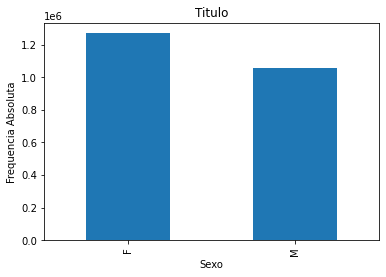

In [9]:
#Verificando a contagem do sexo
#Filtro para retirar ocorrência de 'I'
sexo = data.loc[data['paciente_enumSexoBiologico']!='I']
sexo.groupby(['paciente_enumSexoBiologico']).size().plot.bar(title = "Titulo", xlabel= "Sexo", ylabel= "Frequencia Absoluta")


In [10]:
#Calculando minimo, maximo, desvio padrão e medidas de tendencia central da idade

def medidas_estatisicas (arr):
    print ('Medidas idade: ')
    print ('Maximo: ', max(arr.dropna()))
    print ('Minimo: ', min(arr.dropna()))
    print ('Desvio padrão: ', sns.stdev(arr.dropna()))
    print ('Mediana: ', sns.median(arr.dropna()))
    print('Media: ', sns.mean(arr.dropna()))
    print('Moda: ', sns.mode(arr))


In [133]:
medidas_estatisicas(data['paciente_idade'])

Medidas idade: 
Maximo:  122.0
Minimo:  0.0
Desvio padrão:  19.428443821792623
Mediana:  40.0
Media:  40.48796874084271
Moda:  40.0


In [15]:
medidas_estatisicas(data['paciente_idade'].loc[data['paciente_idade']<100])

Medidas idade: 
Maximo:  99.0
Minimo:  0.0
Desvio padrão:  19.08073013518132
Mediana:  40.0
Media:  40.891410010297065
Moda:  40.0


In [16]:
#Gráficos para avaliar a distribuição da variável Idade

from turtle import color


def freq_plot (arr):
    fig=plt.figure(figsize = (15,5))
    specs=plt.GridSpec(ncols=2, nrows=1, figure=fig)
    fig1=fig.add_subplot(specs[0,0])
    fig2=fig.add_subplot(specs[0,1])
    fig1.hist(arr,10)
    fig2.boxplot(x=arr.dropna())

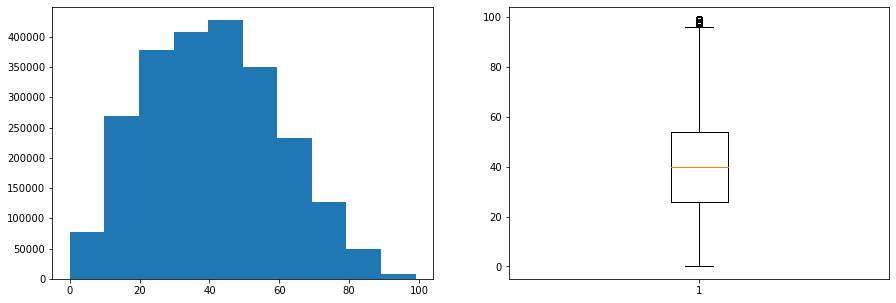

In [17]:
freq_plot(data['paciente_idade'].loc[data['paciente_idade']<100])

<AxesSubplot:xlabel='paciente_racaCor_valor'>

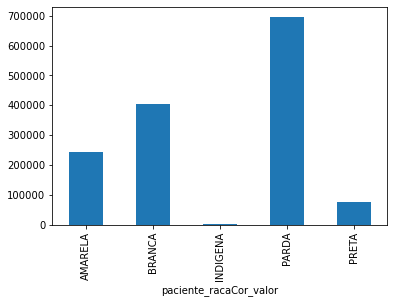

In [135]:
#Verificando dados das colunas 'paciente_racaCor_codigo' e 'paciente_racaCor_valor'
cod_raca = data.loc[data['paciente_racaCor_codigo']!= 99.0]
cod_raca.groupby(['paciente_racaCor_valor']).size().plot.bar()



<AxesSubplot:xlabel='vacina_descricao_dose'>

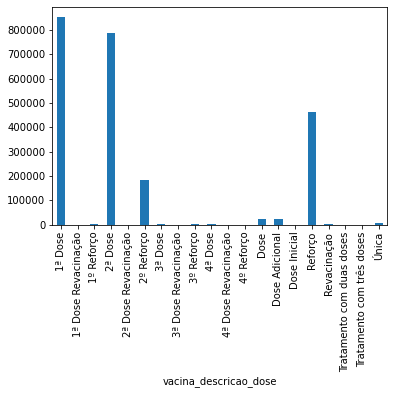

In [139]:
data.groupby(['vacina_descricao_dose']).size().plot.bar()

Text(0.5, 1.0, 'Numero de vacina por período')

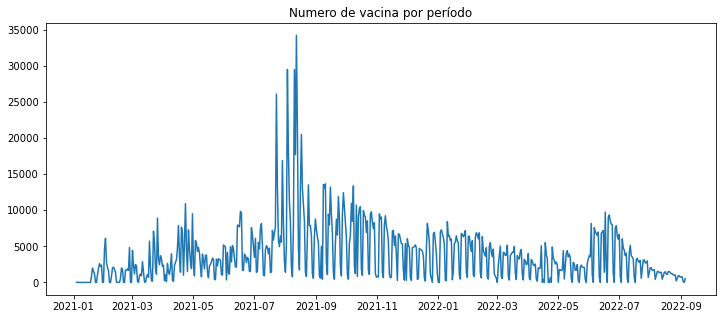

In [248]:
#Preparando os dados para plotar um gráfico de série temporal > 2020
#O dataframe está poluido com registros anteriores a vacinação

    #Transformando o array vacina_dataAplicacao para o formato de data
data['vacina_dataAplicacao'] = pd.to_datetime(data['vacina_dataAplicacao'])
    #Criando uma coluna apenas com o ano para aplicar filtro
data['Ano']=pd.DatetimeIndex(data['vacina_dataAplicacao']).year
    #Sabe-se que a vacinação no Distrito Federal começou em 2021, logo o filtro é apenas para o período
data_aplicacao = data.loc[data['Ano']>2020]
vax = data_aplicacao.groupby(data['vacina_dataAplicacao']).size()
    #Gráfico mostrando numero de vacinações por período
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(vax)

plt.title('Numero de vacina por período')

Text(0.5, 0, '')

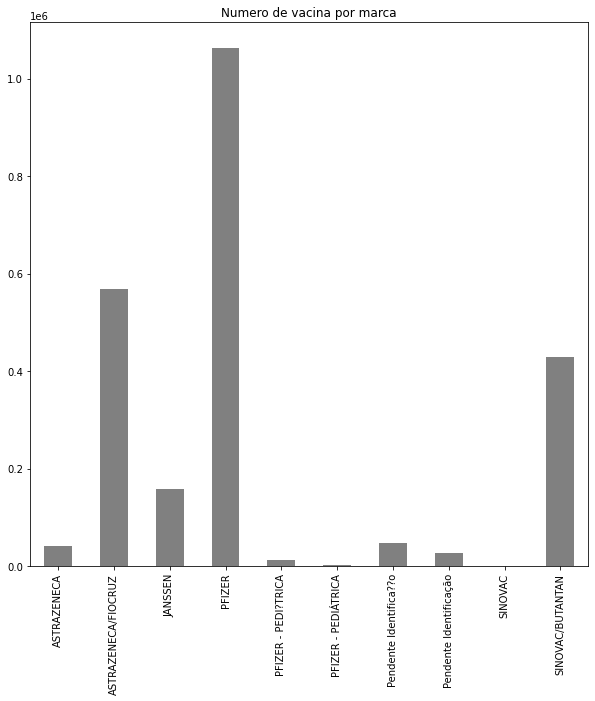

In [238]:
agrupado_vac=data.groupby(['vacina_fabricante_nome']).size()
plt.figure(figsize=(10,10))
agrupado_vac.plot.bar(color='gray')
plt.xticks(rotation=90)
plt.title('Numero de vacina por marca')
plt.xlabel('')

In [274]:
#Agrupando dados por período e marca da vacina

butantan_data = data.loc[(data['Ano']>2020) & (data['vacina_fabricante_nome']=='SINOVAC/BUTANTAN')]
group_butantan_data = butantan_data.groupby(['vacina_dataAplicacao']).size()

astrazeneca_data = data.loc[(data['Ano']>2020) & (data['vacina_fabricante_nome']=='ASTRAZENECA/FIOCRUZ')]
group_astrazeneca_data = astrazeneca_data.groupby(['vacina_dataAplicacao']).size()

janssen_data = data.loc[(data['Ano']>2020) & (data['vacina_fabricante_nome']=='JANSSEN')]
group_janssen_data = janssen_data.groupby(['vacina_dataAplicacao']).size()

pfizer_data = data.loc[(data['Ano']>2020) & (data['vacina_fabricante_nome']=='PFIZER')]
group_pfizer_data = pfizer_data.groupby(['vacina_dataAplicacao']).size()

'''
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(group_fabricante_data)
plt.title('Distribuição da vacina SINOVAC/BUTANTAN por período')
plt.ylabel('Quantidade')'''

"\nfig,ax=plt.subplots(figsize=(12,5))\nax.plot(group_fabricante_data)\nplt.title('Distribuição da vacina SINOVAC/BUTANTAN por período')\nplt.ylabel('Quantidade')"

Text(0.5, 1.0, 'Distribuição total de vacinação.')

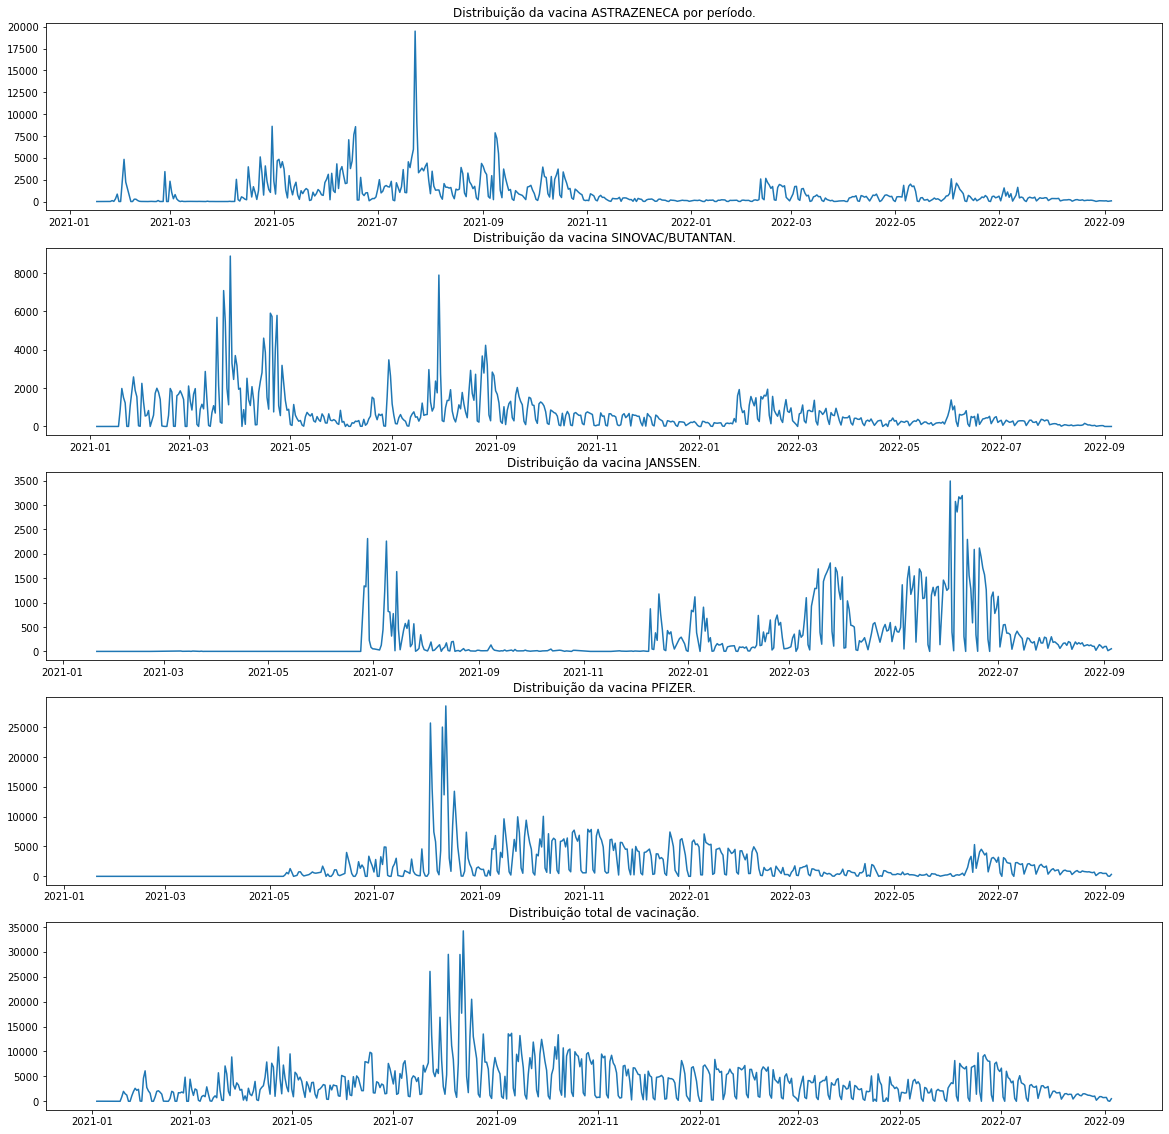

In [281]:
#Gráficos das principais vacinas no período.

fig=plt.figure(figsize = (20,20))
specs=plt.GridSpec(ncols=1, nrows=5, figure=fig)
fig1=fig.add_subplot(specs[0,0])
fig2=fig.add_subplot(specs[1,0])
fig3=fig.add_subplot(specs[2,0])
fig4=fig.add_subplot(specs[3,0])
fig5=fig.add_subplot(specs[4,0])

fig1.plot(group_astrazeneca_data)
fig1.set_title('Distribuição da vacina ASTRAZENECA por período.')
#plt.ylabel('Quantidade')
fig2.plot(group_butantan_data)
fig2.set_title('Distribuição da vacina SINOVAC/BUTANTAN.')
#plt.ylabel('Quantidade')
fig3.plot(group_janssen_data)
fig3.set_title('Distribuição da vacina JANSSEN.')
#plt.ylabel('Quantidade')
fig4.plot(group_pfizer_data)
fig4.set_title('Distribuição da vacina PFIZER.')
#plt.ylabel('Quantidade')
fig5.plot(vax)
fig5.set_title('Distribuição total de vacinação.')

Text(0, 0.5, 'Quantidade')

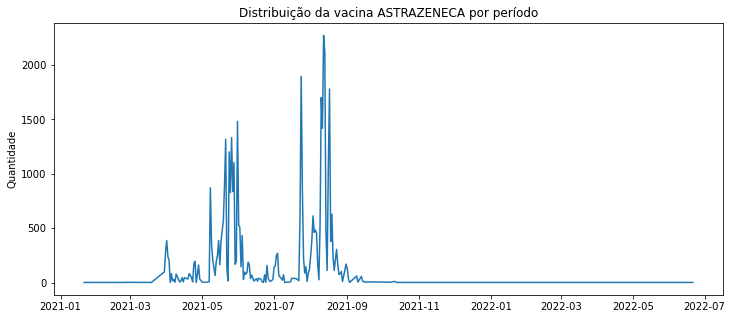

In [250]:
astrazeneca_data = data.loc[(data['Ano']>2020) & (data['vacina_fabricante_nome']=='ASTRAZENECA')]
group_astrazeneca_data = astrazeneca_data.groupby(['vacina_dataAplicacao']).size()
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(group_astrazeneca_data)
plt.title('Distribuição da vacina ASTRAZENECA por período')
plt.ylabel('Quantidade')

In [83]:
#Verificar como está estruturado o dado
agrup_mun_ibge=data.groupby(['paciente_endereco_coIbgeMunicipio', 'paciente_endereco_nmMunicipio']).size()
agrup_mun_ibge

paciente_endereco_coIbgeMunicipio  paciente_endereco_nmMunicipio
110001.0                           ALTA FLORESTA D'OESTE              3
110002.0                           ARIQUEMES                         17
110004.0                           CACOAL                            12
110005.0                           CEREJEIRAS                         1
110007.0                           CORUMBIARA                         1
                                                                   ... 
None                               None                             149
                                   SANTA CRUZ                         1
                                   brasilia                           1
                                   catalao                            1
                                   hokkaido                           1
Length: 8137, dtype: int64

In [88]:
#Substituição dos NA em 'paciente_endereco_nmMunicipio' 
# de acordo com a coluna 'paciente_endereco_coIbgeMunicipio'
data['paciente_endereco_nmMunicipio'].fillna('paciente_endereco_coIbgeMunicipio', inplace=True)
data.loc[data['paciente_endereco_coIbgeMunicipio']==530010.0, 'paciente_endereco_nmMunicipio']='BRASILIA'

In [89]:
#Check se foi feita a substituição
data['paciente_endereco_nmMunicipio']=='paciente_endereco_coIbgeMunicipio'
len(data.loc[data['paciente_endereco_nmMunicipio']=='paciente_endereco_coIbgeMunicipio', :])

19361

In [90]:
moda_cod_país=sns.mode(data['paciente_endereco_coPais'])
moda_cod_país

'10'

In [91]:
#Substituição de NA na col 'paciente_endereco_coPais' pela moda
data['paciente_endereco_coPais'].fillna(moda_cod_país, inplace=True)

In [92]:
#Substituição de NA na col 'paciente_endereço_nmPais' de acordo com a coluna 'paciente_endereço_coPais'
data['paciente_endereco_nmPais'].fillna('paciente_endereco_coPais', inplace=True)
data.loc[data['paciente_endereco_coPais']==10.0, 'paciente_endereco_nmPais']='BRASIL'

In [93]:
data['paciente_endereco_nmPais']=='paciente_endereco_coPais'
len(data.loc[data['paciente_endereco_nmPais']=='paciente_endereco_coPais', :])

19326

In [94]:
#Check nos dados das colunas Pais
agrup_pais=data.groupby(['paciente_endereco_coPais', 'paciente_endereco_nmPais']).size()
agrup_pais

paciente_endereco_coPais  paciente_endereco_nmPais         
10.0                      BRASIL                                905958
36.0                      ESTADOS UNIDOS DA AMERICA                  1
41.0                      JAPAO                                      2
85.0                      MEXICO                                     1
92.0                      VENEZUELA                                  2
221.0                     RUANDA                                     3
356.0                     CONGO, REPUBLICA DO (BRAZZAVILLE)          1
10                        BRASIL                               1412169
                          paciente_endereco_coPais               19326
103                       GIBRALTAR                                  1
173                       AFRICA DO SUL                              1
196                       GUINE EQUATORIAL                           1
22                        BOLIVIA                                    3
221              

In [95]:
#Padronização dados col 'paciente_endereco_nmPais'
data.loc[data['paciente_endereco_nmPais']=='None', 'paciente_endereco_nmPais']='BRASIL'

In [96]:
#Padronização dados col 'paciente_endereco_coPais'
data.loc[data['paciente_endereco_coPais']=='None', 'paciente_endereco_coPais']=10.0

In [97]:
#Padronização dados col 'paciente_endereco_coPais'
# Convertendo o tipo de variável para possibilidar a padronização 
data['paciente_endereco_coPais']=data['paciente_endereco_coPais'].astype(float)

In [98]:
#Padronização dados col 'paciente_endereco_coPais'
data.loc[data['paciente_endereco_coPais']==10, 'paciente_endereco_coPais']=10.0

In [99]:
agrup_pais2=data.groupby(['paciente_endereco_coPais', 'paciente_endereco_nmPais']).size()
agrup_pais2

paciente_endereco_coPais  paciente_endereco_nmPais         
10.0                      BRASIL                               2318269
                          paciente_endereco_coPais               19326
22.0                      BOLIVIA                                    3
24.0                      PARAGUAI                                   3
30.0                      ALEMANHA                                   1
35.0                      ESPANHA                                    2
36.0                      ESTADOS UNIDOS DA AMERICA                  1
41.0                      JAPAO                                      3
85.0                      MEXICO                                     2
92.0                      VENEZUELA                                  3
94.0                      ANDORRA                                    1
103.0                     GIBRALTAR                                  1
173.0                     AFRICA DO SUL                              1
196.0            

In [100]:
data['paciente_endereco_uf'].head()

0    DF
1    RS
2    DF
3    DF
4    DF
Name: paciente_endereco_uf, dtype: object

In [101]:
data['paciente_endereco_uf'].fillna('paciente_endereco_coIbgeMunicipio', inplace=True)
data.loc[data['paciente_endereco_coIbgeMunicipio']==530010.0, 'paciente_endereco_uf']='DF'

In [102]:
data['paciente_endereco_uf']=='paciente_endereco_coIbgeMunicipio'
len(data.loc[data['paciente_endereco_uf']=='paciente_endereco_coIbgeMunicipio', :])

19383

In [103]:
vac_cat=data.groupby(['vacina_categoria_codigo', 'vacina_categoria_nome']).size()
vac_cat

vacina_categoria_codigo  vacina_categoria_nome                          
1.0                      Comorbidades                                        195469
2.0                      Faixa Etária                                       1687425
3.0                      Pessoas de 60 anos ou mais institucionalizadas        7055
4.0                      Forças Armadas (membros ativos)                      13101
5.0                      Forças de Segurança e Salvamento                     19164
6.0                      Povos e Comunidades Tradicionais                       377
7.0                      Povos Indígenas                                        337
8.0                      Trabalhadores da Educação                            44255
9.0                      Trabalhadores de Saúde                              157842
10.0                     Trabalhadores de Transporte                          11049
11.0                     Pessoas com Deficiência                              12791
12.

In [105]:
data['vacina_categoria_codigo'].fillna(moda_vac_cod, inplace=True)

In [106]:
data['vacina_categoria_nome'].fillna('vacina_categoria_codigo', inplace=True)
data.loc[data['vacina_categoria_codigo']==2.0, 'vacina_categoria_nome']='Faixa Etária'

In [107]:
agrup_vac_nome=data.groupby(['vacina_fabricante_nome']).size()
agrup_vac_nome

vacina_fabricante_nome
ASTRAZENECA                 40971
ASTRAZENECA/FIOCRUZ        567391
JANSSEN                    157562
PFIZER                    1060682
PFIZER - PEDI?TRICA         11432
PFIZER - PEDIÁTRICA          2235
Pendente Identifica??o      41534
Pendente Identificação      26723
SINOVAC                        94
SINOVAC/BUTANTAN           428999
dtype: int64

In [108]:
agrup_vac_ref=data.groupby(['vacina_fabricante_referencia', 'vacina_fabricante_nome']).size()
agrup_vac_ref

vacina_fabricante_referencia  vacina_fabricante_nome
149                           ASTRAZENECA/FIOCRUZ        42594
152                           SINOVAC/BUTANTAN           25272
28290                         PFIZER                    132283
                              PFIZER - PEDI?TRICA        11395
                              PFIZER - PEDIÁTRICA         2214
                              Pendente Identifica??o         7
29501                         SINOVAC                       94
29909                         ASTRAZENECA                   23
30587                         JANSSEN                    59561
Organization/00394544000851   ASTRAZENECA                40765
                              JANSSEN                    19630
                              PFIZER                    625412
Organization/149              ASTRAZENECA/FIOCRUZ        74603
Organization/152              SINOVAC/BUTANTAN           74688
Organization/28290            PFIZER                    302339
  

In [109]:
data.loc[data['vacina_fabricante_nome']=='Pendente Identificação', 'vacina_fabricante_nome']='PFIZER'

In [110]:
# Cruzei os dados NA da col 'vacina_fabricante_referencia' com a col 'vacina_fabricante_nome'
data['vacina_fabricante_referencia'].fillna('vacina_fabricante_nome', inplace=True)

In [111]:
agrup_vac_nome=data.groupby(['vacina_fabricante_nome']).size()
agrup_vac_nome

vacina_fabricante_nome
ASTRAZENECA                 40971
ASTRAZENECA/FIOCRUZ        567391
JANSSEN                    157562
PFIZER                    1087405
PFIZER - PEDI?TRICA         11432
PFIZER - PEDIÁTRICA          2235
Pendente Identifica??o      41534
SINOVAC                        94
SINOVAC/BUTANTAN           428999
dtype: int64

In [112]:
agrup_vac_ref2=data.groupby(['vacina_fabricante_referencia', 'vacina_fabricante_nome']).size()
agrup_vac_ref2

vacina_fabricante_referencia  vacina_fabricante_nome
149                           ASTRAZENECA/FIOCRUZ        42594
152                           SINOVAC/BUTANTAN           25272
28290                         PFIZER                    132283
                              PFIZER - PEDI?TRICA        11395
                              PFIZER - PEDIÁTRICA         2214
                              Pendente Identifica??o         7
29501                         SINOVAC                       94
29909                         ASTRAZENECA                   23
30587                         JANSSEN                    59561
Organization/00394544000851   ASTRAZENECA                40765
                              JANSSEN                    19630
                              PFIZER                    625412
Organization/149              ASTRAZENECA/FIOCRUZ        74603
Organization/152              SINOVAC/BUTANTAN           74688
Organization/28290            PFIZER                    329062
  

In [113]:
#Selecionei as duas colunas ['vacina_fabricante_referencia'; 'vacina_fabricante_nome']
#Substituí as linhas onde a referência estava constando "vacina_fabricante_referencia"
# pela moda da referência, de acordo com cada nome de vacina. 
data.loc[(data['vacina_fabricante_referencia']=='vacina_fabricante_nome') & (data['vacina_fabricante_nome']=='PFIZER'), 'vacina_fabricante_referencia']='Organization/00394544000851'
data.loc[(data['vacina_fabricante_referencia']=='vacina_fabricante_nome') & (data['vacina_fabricante_nome']=='ASTRAZENECA/FIOCRUZ'), 'vacina_fabricante_referencia']='Organization/33781055000135'
data.loc[(data['vacina_fabricante_referencia']=='vacina_fabricante_nome') & (data['vacina_fabricante_nome']=='JANSSEN'), 'vacina_fabricante_referencia']='Organization/30587'
data.loc[(data['vacina_fabricante_referencia']=='vacina_fabricante_nome') & (data['vacina_fabricante_nome']=='SINOVAC/BUTANTAN'), 'vacina_fabricante_referencia']='Organization/61189445000156'

In [114]:
agrup_vac_ref3=data.groupby(['vacina_fabricante_referencia', 'vacina_fabricante_nome']).size()
agrup_vac_ref3

vacina_fabricante_referencia  vacina_fabricante_nome
149                           ASTRAZENECA/FIOCRUZ        42594
152                           SINOVAC/BUTANTAN           25272
28290                         PFIZER                    132283
                              PFIZER - PEDI?TRICA        11395
                              PFIZER - PEDIÁTRICA         2214
                              Pendente Identifica??o         7
29501                         SINOVAC                       94
29909                         ASTRAZENECA                   23
30587                         JANSSEN                    59561
Organization/00394544000851   ASTRAZENECA                40765
                              JANSSEN                    19630
                              PFIZER                    626060
Organization/149              ASTRAZENECA/FIOCRUZ        74603
Organization/152              SINOVAC/BUTANTAN           74688
Organization/28290            PFIZER                    329062
  

In [137]:
agrup_vac_ref3=data.groupby(['vacina_fabricante_nome']).size()
agrup_vac_ref3

vacina_fabricante_nome
ASTRAZENECA                 40971
ASTRAZENECA/FIOCRUZ        567391
JANSSEN                    157562
PFIZER                    1060682
PFIZER - PEDI?TRICA         11432
PFIZER - PEDIÁTRICA          2235
Pendente Identifica??o      41534
Pendente Identificação      26723
SINOVAC                        94
SINOVAC/BUTANTAN           428999
dtype: int64

In [115]:
agrup_nac=data.groupby(['paciente_nacionalidade_enumNacionalidade', 'paciente_endereco_nmPais']).size()
agrup_nac

paciente_nacionalidade_enumNacionalidade  paciente_endereco_nmPais         
B                                         AFRICA DO SUL                              1
                                          ALEMANHA                                   1
                                          ANDORRA                                    1
                                          BRASIL                               2306419
                                          CONGO, REPUBLICA DO (BRAZZAVILLE)          1
                                          ESPANHA                                    2
                                          ESTADOS UNIDOS DA AMERICA                  1
                                          GIBRALTAR                                  1
                                          GUINE EQUATORIAL                           1
                                          INDONESIA                                  1
                                          JAPAO       

In [116]:
data['paciente_nacionalidade_enumNacionalidade'].fillna('paciente_endereco_nmPais', inplace=True)

In [117]:
data.loc[(data['paciente_nacionalidade_enumNacionalidade']=='paciente_endereco_nmPais') & (data['paciente_endereco_nmPais']=='BRASIL'), 'paciente_nacionalidade_enumNacionalidade']='B'
data.loc[(data['paciente_nacionalidade_enumNacionalidade']=='paciente_endereco_nmPais') & (data['paciente_endereco_nmPais']!='BRASIL'), 'paciente_nacionalidade_enumNacionalidade']='E'

In [118]:
agrup_nac3=data.groupby(['paciente_nacionalidade_enumNacionalidade', 'paciente_endereco_nmPais']).size()
agrup_nac3

paciente_nacionalidade_enumNacionalidade  paciente_endereco_nmPais         
B                                         AFRICA DO SUL                              1
                                          ALEMANHA                                   1
                                          ANDORRA                                    1
                                          BRASIL                               2307302
                                          CONGO, REPUBLICA DO (BRAZZAVILLE)          1
                                          ESPANHA                                    2
                                          ESTADOS UNIDOS DA AMERICA                  1
                                          GIBRALTAR                                  1
                                          GUINE EQUATORIAL                           1
                                          INDONESIA                                  1
                                          JAPAO       

In [119]:
#Transformei na col 'paciente_endereco_nmPais' a string 'None' em BRASIL
data.loc[data['paciente_endereco_nmPais']=='None', 'paciente_endereco_nmPais']='BRASIL'

In [120]:
#Teste para saber se pode atribuir os NA em 'paciente_nacionalidade_enumNacionalidade'
# a B (Brasileiro)
data['paciente_nacionalidade_enumNacionalidade'].fillna('teste', inplace=True)

In [121]:
agrup_nac4=data.groupby(['paciente_nacionalidade_enumNacionalidade', 'paciente_endereco_nmPais']).size()
agrup_nac4

paciente_nacionalidade_enumNacionalidade  paciente_endereco_nmPais         
B                                         AFRICA DO SUL                              1
                                          ALEMANHA                                   1
                                          ANDORRA                                    1
                                          BRASIL                               2307302
                                          CONGO, REPUBLICA DO (BRAZZAVILLE)          1
                                          ESPANHA                                    2
                                          ESTADOS UNIDOS DA AMERICA                  1
                                          GIBRALTAR                                  1
                                          GUINE EQUATORIAL                           1
                                          INDONESIA                                  1
                                          JAPAO       

In [122]:
#Transformei na col 'paciente_nacionalidade_enumNacionalidade' a string 'None' em B
# OBS: Fiz isso após observação preliminar dos dados.
data.loc[data['paciente_nacionalidade_enumNacionalidade'].isin(['None','teste']), 'paciente_nacionalidade_enumNacionalidade']='B'

In [123]:
agrup_nac5=data.groupby(['paciente_nacionalidade_enumNacionalidade', 'paciente_endereco_nmPais']).size()
agrup_nac5

paciente_nacionalidade_enumNacionalidade  paciente_endereco_nmPais         
B                                         AFRICA DO SUL                              1
                                          ALEMANHA                                   1
                                          ANDORRA                                    1
                                          BRASIL                               2307530
                                          CONGO, REPUBLICA DO (BRAZZAVILLE)          1
                                          ESPANHA                                    2
                                          ESTADOS UNIDOS DA AMERICA                  1
                                          GIBRALTAR                                  1
                                          GUINE EQUATORIAL                           1
                                          INDONESIA                                  1
                                          JAPAO       

In [124]:
vac2=data.groupby(['vacina_codigo', 'vacina_nome']).size()
vac2

vacina_codigo  vacina_nome                              
9              HepB                                            3831
14             VFA                                             3190
15             BCG                                              526
18             VR                                                 6
21             VPP23                                             37
22             VIP                                             2206
23             IGHR                                               2
24             SCR                                             5753
25             dT                                              2356
26             VPC10                                           2401
28             VOP                                             1697
33             INF3                                            4014
34             VAR                                             1979
37             Vero                                        

In [125]:
dose=data.groupby(['vacina_descricao_dose']).size()
dose

vacina_descricao_dose
1ª Dose                      851504
1ª Dose Revacinação              51
1º Reforço                     2821
2ª Dose                      785812
2ª Dose Revacinação              37
2º Reforço                   181592
3ª Dose                        2898
3ª Dose Revacinação              20
3º Reforço                     1129
4ª Dose                          78
4ª Dose Revacinação               2
4º Reforço                        5
Dose                          24562
Dose Adicional                20943
Dose Inicial                     15
Reforço                      461048
Revacinação                     154
Tratamento com duas doses         1
Tratamento com três doses         1
Única                          4950
dtype: int64

In [126]:
data.dropna(subset=['paciente_id'], inplace=True)

In [127]:
data.shape

(2337619, 32)

In [128]:
Idade_Outside=data[data['paciente_idade']>=100].index

In [129]:
data=data.drop(Idade_Outside)

In [95]:
data.isnull().sum()

document_id                                      0
paciente_id                                      7
paciente_idade                                   7
paciente_dataNascimento                          7
paciente_enumSexoBiologico                       7
paciente_racaCor_codigo                          7
paciente_racaCor_valor                           7
paciente_endereco_coIbgeMunicipio            19503
paciente_endereco_coPais                     19446
paciente_endereco_nmMunicipio                19481
paciente_endereco_nmPais                     19446
paciente_endereco_uf                         19503
paciente_endereco_cep                       271219
paciente_nacionalidade_enumNacionalidade       890
estabelecimento_valor                            0
estabelecimento_razaoSocial                      0
estalecimento_noFantasia                         0
estabelecimento_municipio_codigo                 0
estabelecimento_municipio_nome                   0
estabelecimento_uf             

C:\Users\mathe\AppData\Local\Temp\ipykernel_10768\1495116993.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sbn.distplot(data.paciente_idade, hist=True)


Text(0, 0.5, 'Frequencia')

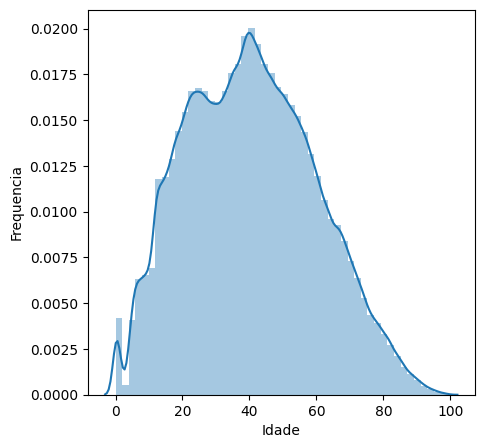

In [133]:
plt.figure(figsize=(5,5))
p=sbn.distplot(data.paciente_idade, hist=True)
p.set_xlabel('Idade')
p.set_ylabel('Frequencia')

In [135]:
data['grupo_idade']='paciente_idade'

In [136]:
data['grupo_idade']=data['paciente_idade'].apply(lambda y: 'Adolescente'if y<=20 else
                                                           'Jovem_adulto'if y>20 and y<=40 else
                                                           'Adulto' if y>40 and y<60 else
                                                           'Idoso' if y>=60 else 'NA' )

In [137]:
agrupado_id_vac=data.groupby([ data['vacina_fabricante_nome']])

In [138]:
agrupado_id=data.groupby(['grupo_idade']).size()

Text(0.5, 0, '')

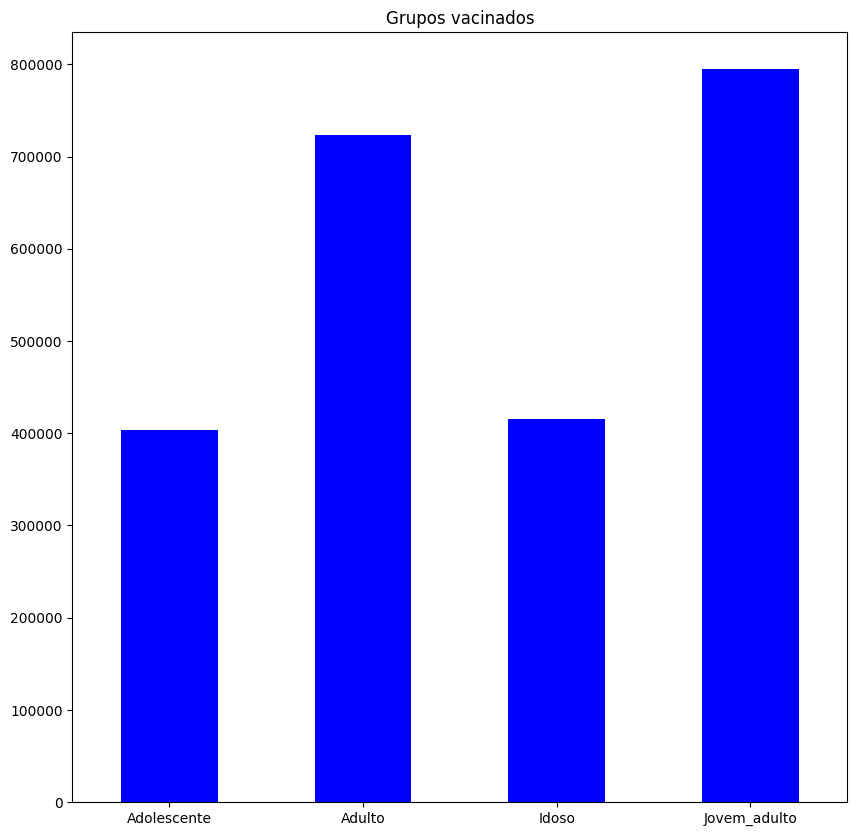

In [139]:
plt.figure(figsize=(10,10))
agrupado_id.plot.bar(color='blue')
plt.xticks(rotation=0)
plt.title('Grupos vacinados')
plt.xlabel('')